The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.
In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",100)

In [ ]:
# /content/Test.csv
test = pd.read_csv("/content/Test.csv")

# /content/Train.csv
train = pd.read_csv("/content/Train.csv")

train.head(1)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0


In [ ]:
combined = pd.concat([train,test],ignore_index = True)

train.shape,test.shape,combined.shape

((21000, 15), (9000, 14), (30000, 15))

In [ ]:
combined.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

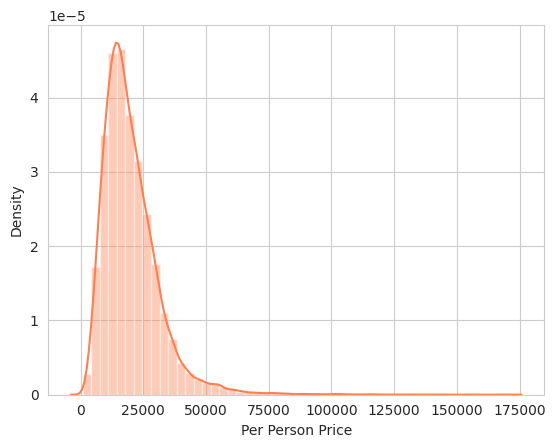

In [ ]:
sns.distplot(combined['Per Person Price'],color = "coral")
plt.show()

In [ ]:
len(combined['Places Covered'][0].split("|"))

4

In [ ]:
places = []

for i in combined["Places Covered"]:
  places.append(len(i.split("|")))

In [ ]:
combined["Count_of_places"] = pd.Series(places)

In [ ]:
# Sight seeing places covered

sights = []

for i in combined["Sightseeing Places Covered"]:
  sights.append(len(i.split("|")))

In [ ]:
combined['Count_Of_SSP'] = pd.Series(sights)

In [ ]:
flights = []

for i in combined["Airline"]:
  flights.append(len(i.split("|")))

In [ ]:
combined['Count_Flights'] = pd.Series(sights)

In [ ]:
# Converting the travel date to datetime
combined['Travel Date'] = pd.to_datetime(combined['Travel Date'])

In [ ]:
# Extract the date,month,year

combined["Day"] = combined["Travel Date"].dt.day
combined["Month"] = combined["Travel Date"].dt.month
combined["Year"] = combined["Travel Date"].dt.year

In [ ]:
# Extract the pattern with respect to Target Variable

max_month = combined.groupby('Month')['Per Person Price'].max()
max_days = combined.groupby('Day')['Per Person Price'].max()
max_year = combined.groupby('Year')['Per Person Price'].max()

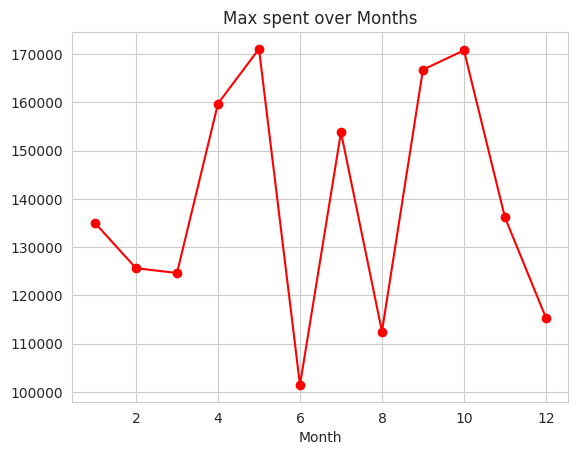

In [ ]:
max_month.plot(kind = "line",marker = "o",color = "red")
plt.title("Max spent over Months")
plt.show()

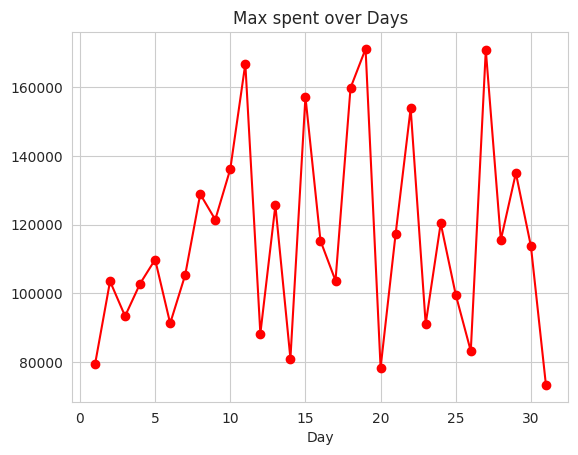

In [ ]:
max_days.plot(kind = "line",marker = "o",color = "red")
plt.title("Max spent over Days")
plt.show()

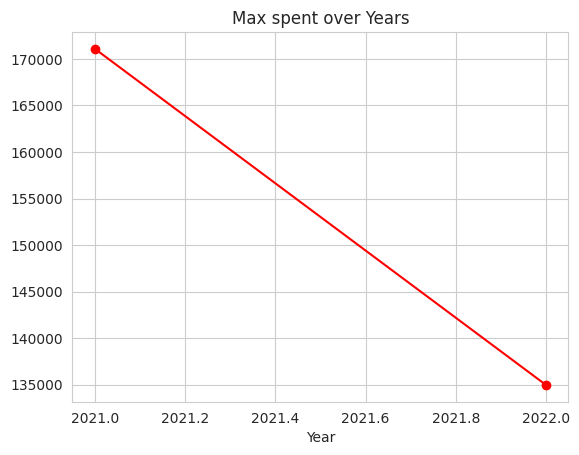

In [ ]:
max_year.plot(kind = "line",marker = "o",color = "red")
plt.title("Max spent over Years")
plt.show()

In [ ]:
peak_months = [4,5,7,9,10]

def peaks(x):
  if x in peak_months:
    return ("Peak_month")
  else:
      return('Lean_month')

In [ ]:
combined["Peak_Months"] = combined["Month"].apply(peaks)

In [ ]:
peak_days = [2,4,5,7,8,10,11,13,15,18,19,21,22,24,27,29]

def peaks(x):
  if x in peak_days:
    return ("Peak_days")
  else:
      return('Lean_days')

In [ ]:
combined["Peak_Days"] = combined["Travel Date"].apply(peaks)

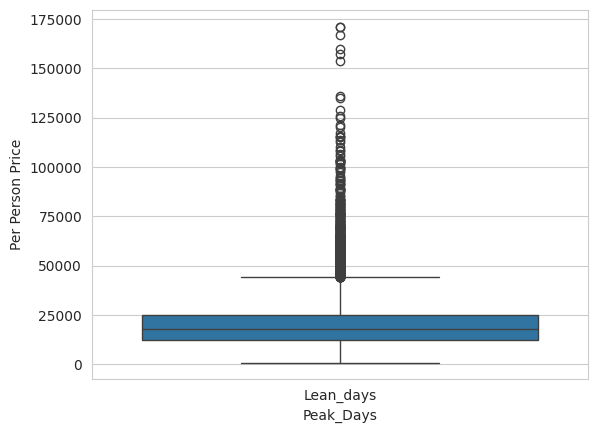

In [ ]:
sns.boxplot(x = "Peak_Days",y = "Per Person Price",data = combined)
plt.show()

In [ ]:
# Extacting the number of nights spent as duration
import re
combined['Duration'] = combined['Itinerary'].apply(lambda x: np.sum(pd.to_numeric(re.findall(r'\d+',x))))
combined['Duration']

0        6
1        4
2        3
3        6
4        7
        ..
29995    4
29996    4
29997    5
29998    7
29999    2
Name: Duration, Length: 30000, dtype: int64

In [ ]:
combined["Ratings"] = combined['Hotel Details'].apply(lambda x: np.mean(pd.to_numeric(re.findall('\d\.\d',x))))

In [ ]:
# Missing value treatments


combined['Ratings'].fillna(combined['Ratings'].median(),inplace = True)
combined.isnull().sum()

Uniq Id                          0
Package Name                     0
Package Type                     0
Destination                      0
Itinerary                        0
Places Covered                   0
Travel Date                      0
Hotel Details                    0
Start City                       0
Airline                          0
Flight Stops                     0
Meals                            0
Sightseeing Places Covered       0
Cancellation Rules               0
Per Person Price              9000
Count_of_places                  0
Count_Of_SSP                     0
Count_Flights                    0
Day                              0
Month                            0
Year                             0
Peak_Months                      0
Peak_Days                        0
Duration                         0
Ratings                          0
dtype: int64

In [ ]:
New_data = combined.drop(['Uniq Id','Destination','Itinerary','Places Covered','Travel Date','Hotel Details','Airline',
                         'Sightseeing Places Covered','Cancellation Rules','Travel Date','Month'],axis=1)

In [ ]:
New_data.groupby('Package Type')['Per Person Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Package Type,,,,,,,,
Budget,466.0,14151.447425,8236.467588,1757.0,8901.250,13114.25,17927.00,64008.5
Deluxe,6006.0,18409.508825,10228.326587,1198.0,12119.000,16426.75,22774.25,171062.5
Luxury,3278.0,23679.556437,11958.923869,2963.0,15471.625,22222.50,29170.75,107850.0
Premium,5581.0,23965.407006,13272.618593,2967.0,15232.000,21767.50,29188.00,170763.0
Standard,5669.0,16354.089081,9363.498521,791.0,10563.500,14729.50,19972.00,153795.0


In [ ]:
package = {"Budget":1,"Deluxe":5,
           "Luxury":2,"Premium":3,"Standard":4}

New_data['Package Type'] = New_data['Package Type'].map(package)

In [ ]:
# Count of Package type basis duration

New_data['PackageType_Duration_Count'] = New_data.groupby(['Package Type','Duration'])['Duration'].transform('count')
New_data['PackageType_Duration_Mean'] = New_data.groupby(['Package Type','Duration'])['Per Person Price'].transform('mean')
New_data['PackageType_Duration_Std'] = New_data.groupby(['Package Type','Duration'])['Per Person Price'].transform('std')

In [ ]:
# Count of Package Name Basis Duration

New_data["PackageName_Duration_Count"] = New_data.groupby(['Package Name','Duration'])['Duration'].transform('count')

In [ ]:
New_data.drop(['Package Type', 'Start City','Package Name'],axis =1,inplace=True)

In [ ]:
New_data['Year'] = New_data.Year.astype('object')

In [ ]:
# Categorical Encoding
dummydata = pd.get_dummies(New_data,drop_first = True)

# Split the data into Train and test

newtrain = dummydata.loc[0:train.shape[0]-1,:]
newtest = dummydata.loc[train.shape[0]:,:]
train.shape,test.shape,newtrain.shape,newtest.shape

((21000, 15), (9000, 14), (21000, 15), (9000, 15))

In [ ]:
# Dropping the Target Variable...

newtest.drop('Per Person Price',axis=1,inplace=True)

from sklearn.ensemble import GradientBoostingRegressor

x = newtrain.drop('Per Person Price',axis=1)
y = newtrain['Per Person Price']

gbm = GradientBoostingRegressor()
pred_gbm = gbm.fit(x,y).predict(newtest)

# Cross Validation, Hyper Parameter, Stacking...

In [ ]:
submission = pd.DataFrame({'Per Person Price':pred_gbm})
submission.to_csv('GBM.csv',index=False)